In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
import lime
import lime.lime_tabular
import random
import seaborn as sns

In [2]:
d = pd.read_csv(r"C:\Users\kevin\Videos\Python Stuff\Data\credit_risk.csv")
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [3]:
d['Gender'].unique()


array(['Male', 'Female', nan], dtype=object)

In [4]:
# Check null values
d.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df = d.dropna(how='any', axis = 0)

In [6]:
# Check how many categorical samples are there in column 'Target'
df['Gender'].value_counts()

Male      624
Female    145
Name: Gender, dtype: int64

In [7]:
df['Loan_Status'].value_counts()

Y    561
N    208
Name: Loan_Status, dtype: int64

In [79]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,LP002969,Male,Yes,1,Graduate,No,2269,2167.0,99.0,360.0,1.0,Semiurban,Y
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


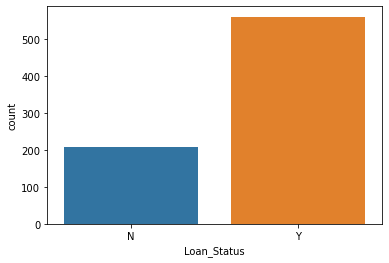

In [8]:
# Visualise count plot
sns.countplot(data=df,x='Loan_Status')
plt.show()

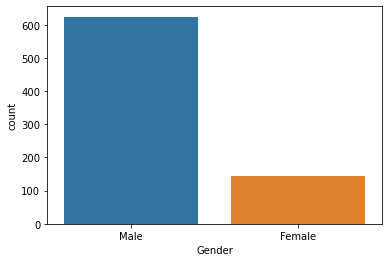

In [9]:
# Visualise count plot
sns.countplot(data=df,x='Gender')
plt.show()

In [10]:
# Now Split DataSet into 2 parts
# Numeric type and Categorical type
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [11]:
df_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
5,5417,4196.0,267.0,360.0,1.0


In [12]:
df_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y
...,...,...,...,...,...,...,...,...
975,LP002969,Male,Yes,1,Graduate,No,Semiurban,Y
976,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,Urban,Y
979,LP002986,Male,Yes,0,Graduate,No,Rural,N


In [13]:
# To convert categorical type data into numeric type.
# Use Label Encoder
from sklearn.preprocessing import LabelEncoder

for col in df_cat:
    # create an object of LabelEncoder
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [14]:
df_cat.dtypes

Loan_ID          int32
Gender           int32
Married          int32
Dependents       int32
Education        int32
Self_Employed    int32
Property_Area    int32
Loan_Status      int32
dtype: object

In [80]:
df_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,0,1,1,1,0,0,0,0
2,1,1,1,0,0,1,2,1
3,2,1,1,0,1,0,2,1
4,3,1,0,0,0,0,2,1
5,4,1,1,2,0,1,2,1
...,...,...,...,...,...,...,...,...
975,758,1,1,1,0,0,1,1
976,759,1,1,3,1,1,2,1
977,761,1,1,0,0,0,2,1
979,766,1,1,0,0,0,0,0


In [15]:
# After applying LabelEncoder we concatenate df_cat and df_num.
df_new=pd.concat([df_num,df_cat],axis=1)

In [16]:
df_new['Loan_Status'].unique()


array([0, 1])

In [17]:
df_new= df_new.drop('Loan_ID',axis=1)

In [18]:
# Split dataset in input and output
X=df_new.drop('Loan_Status',axis=1)    # input
Y=df_new['Loan_Status']                # output

In [19]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,2
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,2
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,2
5,5417,4196.0,267.0,360.0,1.0,1,1,2,0,1,2


In [20]:
# Now Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [21]:
# Now applying Scaling on input data X_train and X_test before we train the model
# Apply StandardScaler on input data training and testing
from sklearn.preprocessing import StandardScaler

In [22]:
# Create an object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train and X_test data

X_train1=ss.fit_transform(X_train)
X_test1=ss.transform(X_test)

In [23]:
X_train1

array([[-0.35086398,  0.23482785,  0.1353235 , ..., -0.51274828,
        -0.39621869, -0.03926265],
       [-0.20859764, -0.21674246, -0.32012038, ..., -0.51274828,
        -0.39621869,  1.2032846 ],
       [-0.36790894, -0.58467535, -0.65500559, ..., -0.51274828,
        -0.39621869, -0.03926265],
       ...,
       [ 0.16942918,  1.44487835,  0.59076739, ..., -0.51274828,
        -0.39621869, -0.03926265],
       [-0.09788979, -0.58467535, -0.11918926, ..., -0.51274828,
        -0.39621869,  1.2032846 ],
       [-0.55996007,  0.00545311, -0.58802855, ...,  1.95027471,
        -0.39621869, -0.03926265]])

In [24]:
# Check how many samples of class 0,1 and 2 class in Y_train
Y_train.value_counts()

1    399
0    139
Name: Loan_Status, dtype: int64

In [25]:
# Create archetecture of neural network

# create the object of Sequential class
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=16,activation='relu',input_shape=(X.shape[1],)),
  tf.keras.layers.Dense(units=16,activation='relu'),
  tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [28]:
# Early Stopping: is used to stop itration.
from tensorflow.keras.callbacks import EarlyStopping
# Callbacks : inbuilt parameter of fit()
# Create Callbacks:-
# EarlyStopping() inbuilt function.
cb=EarlyStopping(
    monitor='val_loss',   # val_loss means testing error
    min_delta=0.00001,   # value of Lambda
    patience=20,
    verbose=1,
    mode='auto',   # main loss
    baseline=None,
    restore_best_weights=False
)

In [29]:
# Train the model
'''
trained_model=model.fit(X_train,Y_train,epochs=4000,batch_size=5,callbacks=cb,
                        validation_split=0.2)
                        '''
# validation_split= 0.2 mean 20% data for validation from X_train,Y_train



X_train_ros,X_val_ros,Y_train_ros,Y_val_ros=train_test_split(X_train1,Y_train,
                                             test_size=0.2,random_state=1)
trained_model=model.fit(X_train_ros,Y_train_ros,epochs=4000,callbacks=cb,
                        validation_data=(X_val_ros,Y_val_ros))

Epoch 1/4000
14/14 [==============================] - 1s 16ms/step - loss: 0.6487 - Accuracy: 0.6465 - val_loss: 0.6218 - val_Accuracy: 0.6389
Epoch 2/4000
14/14 [==============================] - 0s 3ms/step - loss: 0.6071 - Accuracy: 0.7140 - val_loss: 0.5727 - val_Accuracy: 0.7222
Epoch 3/4000
14/14 [==============================] - 0s 3ms/step - loss: 0.5759 - Accuracy: 0.7442 - val_loss: 0.5348 - val_Accuracy: 0.7593
Epoch 4/4000
14/14 [==============================] - 0s 3ms/step - loss: 0.5525 - Accuracy: 0.7558 - val_loss: 0.5051 - val_Accuracy: 0.8056
Epoch 5/4000
14/14 [==============================] - 0s 2ms/step - loss: 0.5324 - Accuracy: 0.7581 - val_loss: 0.4800 - val_Accuracy: 0.8241
Epoch 6/4000
14/14 [==============================] - 0s 2ms/step - loss: 0.5153 - Accuracy: 0.7651 - val_loss: 0.4599 - val_Accuracy: 0.8148
Epoch 7/4000
14/14 [==============================] - 0s 3ms/step - loss: 0.4999 - Accuracy: 0.7791 - val_loss: 0.4462 - val_Accuracy: 0.8426
Epoch

14/14 [==============================] - 0s 2ms/step - loss: 0.3051 - Accuracy: 0.8837 - val_loss: 0.3217 - val_Accuracy: 0.8981
Epoch 59/4000
14/14 [==============================] - 0s 3ms/step - loss: 0.3026 - Accuracy: 0.8814 - val_loss: 0.3139 - val_Accuracy: 0.9074
Epoch 60/4000
14/14 [==============================] - 0s 3ms/step - loss: 0.3014 - Accuracy: 0.8837 - val_loss: 0.3153 - val_Accuracy: 0.9074
Epoch 61/4000
14/14 [==============================] - 0s 2ms/step - loss: 0.3006 - Accuracy: 0.8860 - val_loss: 0.3220 - val_Accuracy: 0.9074
Epoch 62/4000
14/14 [==============================] - 0s 3ms/step - loss: 0.2987 - Accuracy: 0.8884 - val_loss: 0.3188 - val_Accuracy: 0.9074
Epoch 63/4000
14/14 [==============================] - 0s 3ms/step - loss: 0.2975 - Accuracy: 0.8907 - val_loss: 0.3213 - val_Accuracy: 0.9074
Epoch 64/4000
14/14 [==============================] - 0s 3ms/step - loss: 0.2974 - Accuracy: 0.8907 - val_loss: 0.3251 - val_Accuracy: 0.8981
Epoch 65/4000

In [30]:
# training loss and training score
model.evaluate(X_train_ros,Y_train_ros)

14/14 [==============================] - 0s 846us/step - loss: 0.2840 - Accuracy: 0.8907


[0.2840002775192261, 0.8906976580619812]

In [31]:
# testing loss and testing score
model.evaluate(X_val_ros,Y_val_ros)

4/4 [==============================] - 0s 998us/step - loss: 0.3266 - Accuracy: 0.9074


[0.32660865783691406, 0.9074074029922485]

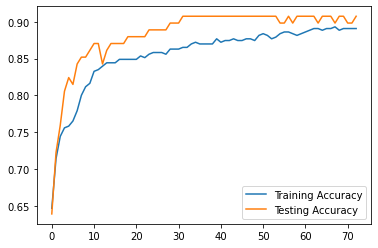

In [32]:
#visualisation the accuracy(training accuracy) and val_accuracy(testing accuracy)
plt.plot(trained_model.history['Accuracy'],label='Training Accuracy')
plt.plot(trained_model.history['val_Accuracy'],label='Testing Accuracy')
plt.legend()
plt.show()

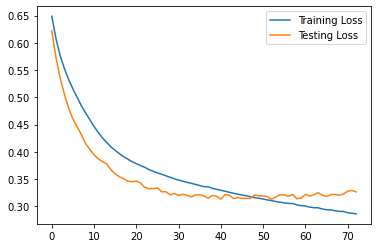

In [33]:
#visualisation the loss(training loss) and val_loss(testing loss)
plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing Loss')
plt.legend()
plt.show()

In [34]:
# test the model with 30% record 
Y_pred=model.predict(X_test)
Y_pred

8/8 [==============================] - 0s 855us/step


array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.4304051e-31],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.7288230e-20],
       [1.0000000e+00],
       [5.6539779e-03],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [6.9734826e-17],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [5.6438711e-18],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [3.1720594e-22],
       [1.000000

In [35]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.43      0.26      0.32        69
           1       0.73      0.85      0.79       162

    accuracy                           0.68       231
   macro avg       0.58      0.56      0.56       231
weighted avg       0.64      0.68      0.65       231

[[ 18  51]
 [ 24 138]]


# Fairness Metrics

## Balanced Accuracy Score

In [37]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, Y_pred)

0.5563607085346216

## F beta score

In [38]:
from sklearn.metrics import fbeta_score
fbeta_score(Y_test, Y_pred, average='macro', beta=0.5)

0.5656904111855713

In [39]:
fbeta_score(Y_test, Y_pred, average='micro', beta=0.5)

0.6753246753246753

In [40]:
fbeta_score(Y_test, Y_pred, average='weighted', beta=0.5)

0.6405508118091885

In [41]:
fbeta_score(Y_test, Y_pred, average='binary', beta=0.5)

0.7516339869281046

In [42]:
fbeta_score(Y_test, Y_pred, average=None, beta=0.5)

array([0.37974684, 0.75163399])

## AIF360

In [43]:
y_pred=model.predict(X_test1)

8/8 [==============================] - 0s 997us/step


In [44]:
ypred = y_pred.tolist()

In [45]:
# After applying LabelEncoder we concatenate df_cat and df_num.
d_new=X_test
d_new['ypred'] = ypred

In [46]:
d_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ypred
368,6325,0.0,175.0,360.0,1.0,1,1,1,0,0,1,[0.8882111310958862]
136,4583,0.0,84.0,360.0,1.0,0,1,0,0,0,0,[0.6295681595802307]
741,7500,0.0,225.0,360.0,1.0,1,1,2,0,0,2,[0.9513015747070312]
452,3948,1733.0,149.0,360.0,0.0,1,1,0,0,0,0,[0.005155544728040695]
515,3466,3428.0,150.0,360.0,1.0,1,1,3,0,0,0,[0.9503897428512573]
...,...,...,...,...,...,...,...,...,...,...,...,...
304,4000,2500.0,140.0,360.0,1.0,1,0,0,0,0,0,[0.7785427570343018]
549,2785,2016.0,110.0,360.0,1.0,1,1,0,0,0,0,[0.8181346654891968]
827,5708,0.0,150.0,360.0,1.0,1,0,0,0,0,0,[0.6758392453193665]
13,1853,2840.0,114.0,360.0,1.0,1,0,0,0,0,0,[0.8551222681999207]


In [47]:
ypred

[[0.8882111310958862],
 [0.6295681595802307],
 [0.9513015747070312],
 [0.005155544728040695],
 [0.9503897428512573],
 [0.6032518148422241],
 [0.9350154399871826],
 [0.9534040093421936],
 [0.802013099193573],
 [0.9376149773597717],
 [0.9159296154975891],
 [0.9197707772254944],
 [0.9290228486061096],
 [0.8823944926261902],
 [0.9531689882278442],
 [0.9703266620635986],
 [0.8872454762458801],
 [0.021529758349061012],
 [0.9333099126815796],
 [0.8216619491577148],
 [0.8435285687446594],
 [0.920224666595459],
 [0.7012265920639038],
 [0.9815163016319275],
 [0.9106308221817017],
 [0.008446182124316692],
 [0.7205066680908203],
 [0.00848466157913208],
 [0.6062881946563721],
 [0.9684926867485046],
 [0.007474062964320183],
 [0.4494607746601105],
 [0.9256792068481445],
 [0.9699680805206299],
 [0.9930930137634277],
 [0.9220346808433533],
 [0.9275081157684326],
 [0.9312715530395508],
 [0.8587871193885803],
 [0.07738319784402847],
 [0.7671179175376892],
 [0.0015559960156679153],
 [0.922964870929718],
 

In [48]:
import aif360

from aif360.metrics import BinaryLabelDatasetMetric

from aif360.algorithms.preprocessing.optim_preproc import OptimPreproc
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions\
            import load_preproc_data_adult
from aif360.algorithms.preprocessing.optim_preproc_helpers.distortion_functions\
            import get_distortion_adult
from aif360.algorithms.preprocessing.optim_preproc_helpers.opt_tools import OptTools

from IPython.display import Markdown, display

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [57]:
binaryLabelDataset = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df_new,
    label_names=['Loan_Status'],
    protected_attribute_names=['Gender'])

In [63]:
p = [{'Gender': 1.}]
u = [{'Gender': 0.}]
cm = BinaryLabelDatasetMetric(binaryLabelDataset, privileged_groups=p, unprivileged_groups=u)
print("Disparate_Impact", cm.disparate_impact())
print("Statistical Parity Difference", cm.statistical_parity_difference())
print("Consistency (Individual Fairness)", cm.consistency())


Disparate_Impact 0.9221674876847291
Statistical Parity Difference -0.057625994694960214
Consistency (Individual Fairness) [0.71781534]


In [53]:
test= X_test.drop('ypred', axis= 1)

In [56]:
df_new

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1
5,5417,4196.0,267.0,360.0,1.0,1,1,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
975,2269,2167.0,99.0,360.0,1.0,1,1,1,0,0,1,1
976,4009,1777.0,113.0,360.0,1.0,1,1,3,1,1,2,1
977,4158,709.0,115.0,360.0,1.0,1,1,0,0,0,2,1
979,5000,2393.0,158.0,360.0,1.0,1,1,0,0,0,0,0


In [72]:


privileged_groups = [{'Gender': 1}] # Male
unprivileged_groups = [{'Gender': 0}] # Female

In [61]:
binaryLabelDataset

               instance weights        features                               \
                                                                               
                                ApplicantIncome CoapplicantIncome LoanAmount   
instance names                                                                 
1                           1.0          4583.0            1508.0      128.0   
2                           1.0          3000.0               0.0       66.0   
3                           1.0          2583.0            2358.0      120.0   
4                           1.0          6000.0               0.0      141.0   
5                           1.0          5417.0            4196.0      267.0   
...                         ...             ...               ...        ...   
975                         1.0          2269.0            2167.0       99.0   
976                         1.0          4009.0            1777.0      113.0   
977                         1.0         

In [74]:
from aif360.algorithms.preprocessing.reweighing import Reweighing
RW = Reweighing(unprivileged_groups= unprivileged_groups,
               privileged_groups= privileged_groups)
RW.fit(binaryLabelDataset)
dataset_transf_train = RW.transform(binaryLabelDataset)

In [76]:
### Testing 
assert np.abs(dataset_transf_train.instance_weights.sum()-binaryLabelDataset.instance_weights.sum())<1e-6

In [78]:
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train, 
                                         unprivileged_groups=unprivileged_groups,
                                         privileged_groups=privileged_groups)
display(Markdown("#### Transformed training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())
print("Disparate_Impact", metric_transf_train.disparate_impact())
print("Statistical Parity Difference", metric_transf_train.statistical_parity_difference())
print("Consistency (Individual Fairness)", metric_transf_train.consistency())


#### Transformed training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.000000
Disparate_Impact 0.9999999999999997
Statistical Parity Difference -2.220446049250313e-16
Consistency (Individual Fairness) [0.71781534]
